In [1]:
cd ..

/HDD/ECG_physionet


In [2]:
import pandas as pd
import numpy as np
import os
import scipy as sp
import json
import matplotlib.pyplot as plt 
import seaborn as sns
import biosppy

Signal params:
Fs = 500 Hz

# Load the data

In [3]:
DATA_PATH = './data/A/formatted/'

In [4]:
#get a list of files
filenames = [file.split('.')[0] for file in os.listdir(DATA_PATH) if 'json' in file]

# List of meta data
meta_data_list = list()

# Open files and extract meta data
for filename in filenames:
    
    # Import meta dat
    data = json.load(open(DATA_PATH+ f'{filename}.json'))
    meta_data_list.append(data)
    
# Generate DataFrame
meta_data = pd.DataFrame(meta_data_list)

meta_data.head(10)

,filename,datetime,channel_order,age,sex,amp_conversion,fs,fs_resampled,length,num_leads,...,p_waves,p_wave_array,p_wave_times,t_waves,t_wave_array,t_wave_times,labels_unscored_SNOMEDCT,labels_unscored_short,labels_unscored_full,p_and_t_waves
0,A2652,12-May-2020,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",54,male,1000,500,1000,8680,12,...,"[[128, 655, 1174, 1695, 2263, 2763, 3009, 3711...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.656, 0.657], [1.159, 1.161], [2.262, 2.264...","[[334, 888, 1395, 1910, 2464, 2993, 3201, 3936...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.334, 0.346], [0.887, 0.893], [2.463, 2.466...",None,None,None,True
1,A4228,12-May-2020,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",68,male,1000,500,1000,5000,12,...,"[[339, 849, 1356, 1857, 2363, 2869, 3372, 3875...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.335, 0.34], [0.845, 0.851], [1.349, 1.357]...","[[538, 1046, 1552, 2051, 2560, 3065, 3570, 407...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.531, 0.544], [1.038, 1.054], [1.542, 1.559...",None,None,None,True
2,A2889,12-May-2020,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",40,male,1000,500,1000,15500,12,...,"[[40, 437, 826, 1254, 1694, 2131, 2511, 2870, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.435, 0.439], [0.822, 0.825], [1.251, 1.258...","[[228, 626, 1016, 1446, 1884, 2321, 2700, 3058...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.226, 0.231], [0.621, 0.625], [1.013, 1.02]...",None,None,None,True
3,A6312,12-May-2020,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",83,male,1000,500,1000,5000,12,...,"[[525, 1436, 2347, 3258, 3983, 4356], [170, 10...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.166, 0.171], [2.535, 2.535], [3.811, 3.813...","[[892, 1212, 1803, 2118, 2714, 3626, 4126, 456...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.524, 0.534], [0.891, 0.897], [1.248, 1.251...",None,None,None,True
4,A5549,12-May-2020,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",22,female,1000,500,1000,11000,12,...,"[[343, 727, 1128, 1498, 1875, 2226, 2596, 2959...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.345, 0.348], [1.119, 1.125], [1.497, 1.502...","[[141, 535, 923, 1293, 1690, 2062, 2420, 2785,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.04, 0.04], [0.821, 0.821], [0.864, 0.868],...",None,None,None,True
5,A4279,12-May-2020,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",54,female,1000,500,1000,11000,12,...,"[[2, 407, 869, 1536, 1751, 2177, 2474, 2687, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.402, 0.409], [0.823, 0.825], [1.747, 1.753...","[[298, 589, 1048, 1437, 1689, 1912, 2404, 2640...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.299, 0.3], [0.588, 0.592], [1.049, 1.053],...",None,None,None,True
6,A3857,12-May-2020,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",86,male,1000,500,1000,5000,12,...,"[[196, 544, 885, 1220, 1564, 1906, 2240, 2584,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.194, 0.201], [0.543, 0.546], [0.884, 0.889...","[[422, 774, 1113, 1446, 1791, 2133, 2467, 2807...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.417, 0.425], [0.751, 0.753], [0.77, 0.775]...",None,None,None,True
7,A0577,12-May-2020,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",28,female,1000,500,1000,8055,12,...,"[[173, 521, 834, 1511, 1852, 2153, 2520, 2877,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[1.108, 1.115], [1.459, 1.461], [1.775, 1.78]...","[[338, 648, 958, 1280, 1628, 1951, 2281, 2621,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.337, 0.343], [0.957, 0.962], [1.281, 1.286...",None,None,None,True
8,A2824,12-May-2020,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",39,female,1000,500,1000,5000,12,...,"[[0, 374, 754, 1126, 1514, 1921, 2340, 2752, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.367, 0.373], [0.745, 0.749]

# Check consistency in channel order

In [5]:
init = meta_data['channel_order'].values[0]
unique = [init]
for i in range(1,meta_data['channel_order'].shape[0]):
    if init != meta_data['channel_order'].values[i]:
        unique.append(meta_data['channel_order'].values[i])

# Check samples/channels

In [6]:
shapes = meta_data['shape'].values

m_0 = np.inf
m_1 = 0
max_index = 0

for i in range(shapes.shape[0]):
    if shapes[i][0] < m_0:
        m_0 = shapes[i][0]
    if shapes[i][1] > m_1:
        m_1 = shapes[i][1]
        max_index = i

print('Min number of channels: ',m_0)
print('Max number of samples: ',m_1)

Min number of channels:  12
Max number of samples:  72000


In [7]:
max_index

1500

# Make plots

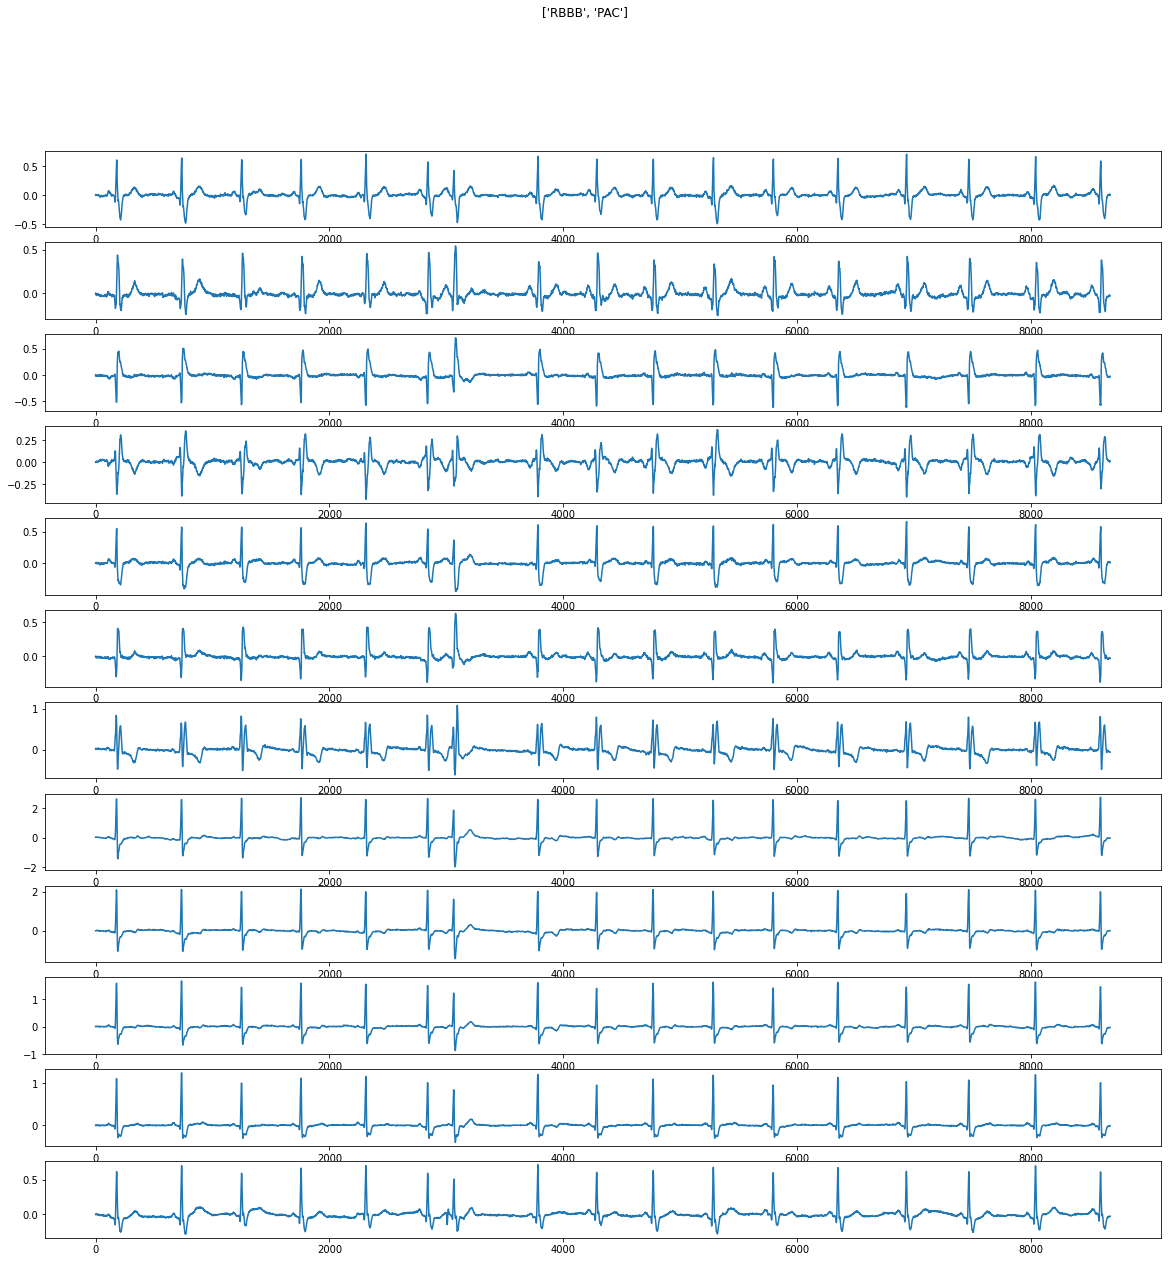

0

In [31]:
def plot_record(record_id,df):
    ecg = np.load(DATA_PATH+df['filename'].values[record_id]+'.npy')
    
    
    #plot the data
    fig,ax = plt.subplots(12,figsize=(20,20))
    fig.suptitle(df['labels'].values[record_id])
    for i in range(ecg.shape[0]):
        ax[i].plot(ecg[i,:])
    plt.show()
    
    return 0

plot_record(record_id=0,df=meta_data)

# Calculate std and mean for scaling

In [45]:
def normalize_channels(X):


    for i in range(X.shape[1]):
        X[:, i] = (X[:, i] - np.mean(X[:, i])) / np.std(X[:, i])

    return X


signal = np.load(DATA_PATH+'A2652'+'.npy')
signal = np.reshape(signal,(-1,12))

#ecg = normalize_channels(ecg)

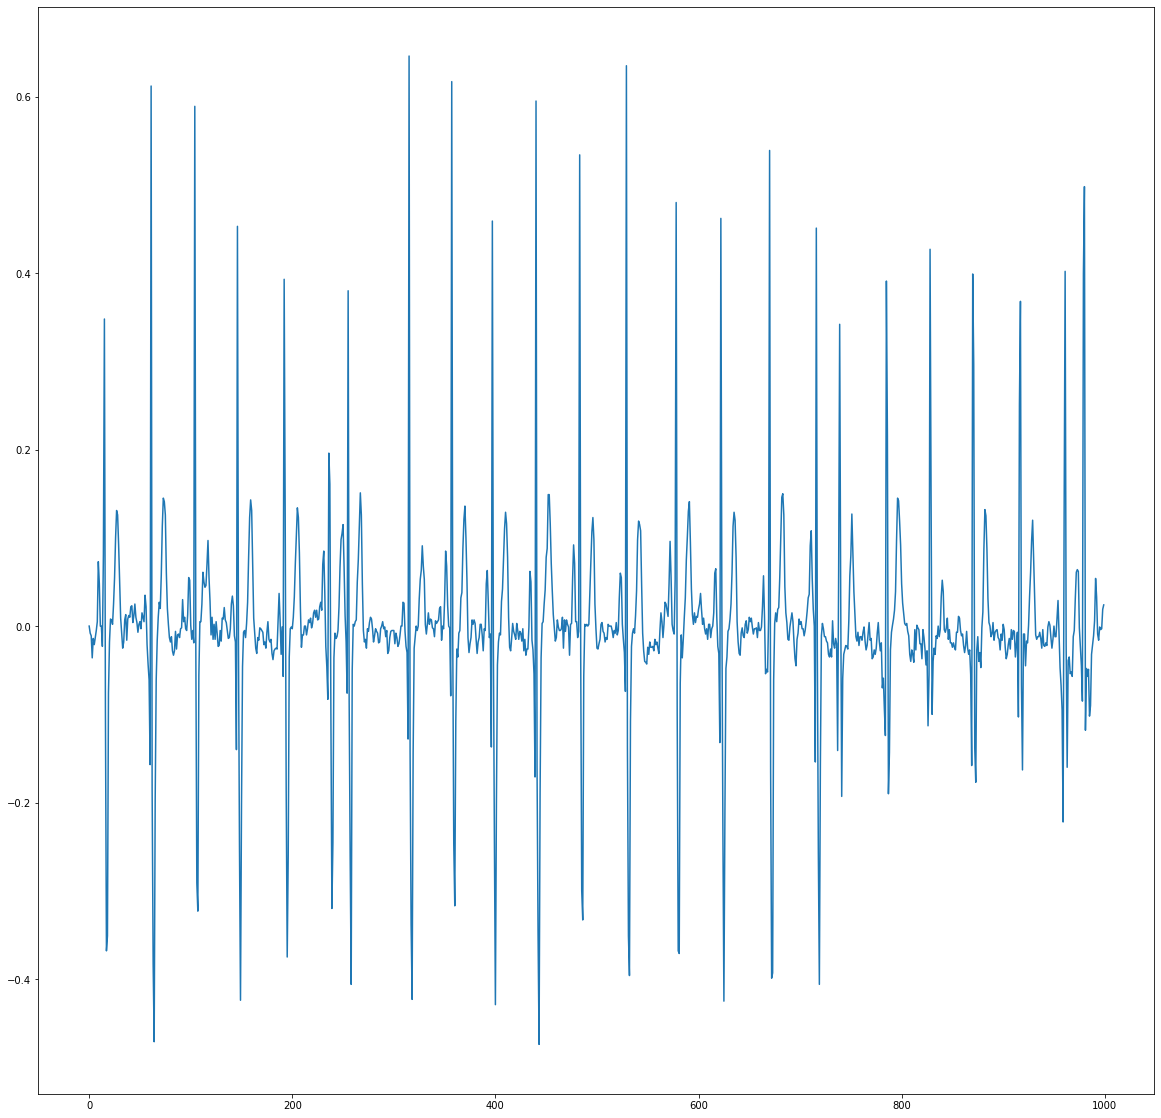

In [46]:
fig = plt.figure(figsize=(20,20))
plt.plot(signal[:1000,4])

# TEST peakdetector

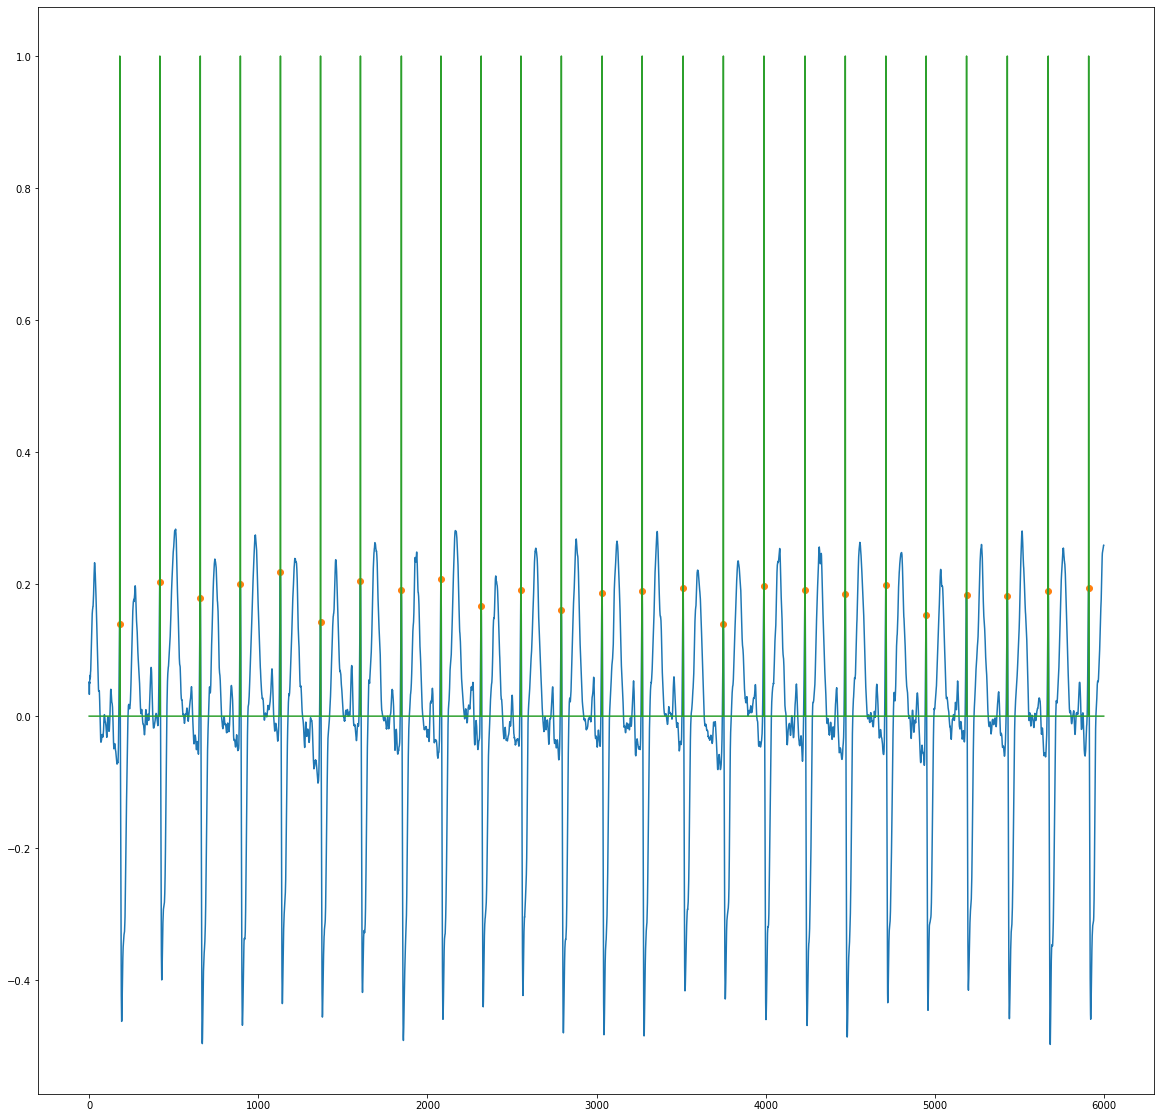

In [10]:
from data_generator import PreProcessing

preprocessing = PreProcessing()


signal = np.load(DATA_PATH+'A0001'+'.npy')

signal = preprocessing.run(signal)
peaks = preprocessing.find_peaks(signal)

fig = plt.figure(figsize=(20,20))
plt.plot(signal[:6000,0])
plt.plot(peaks,signal[peaks,0],'o')
plt.plot(signal[:6000,-1])

# Check distributions of classes

In [13]:
classes = meta_data['label_train'].values
classes_arr = np.array([classes[0]])
classes_arr = np.reshape(classes_arr,(1,-1))

#classes = np.array(classes)

for i in range(1,classes.shape[0]):
    classes_arr = np.concatenate((classes_arr,np.reshape(np.array(classes[i]),(1,-1))),axis=0)
    
classes = np.mean(classes_arr,axis=0)

print('AF: ',np.round(classes[0]*100,3),'%')
print('I-AVB: ',np.round(classes[1]*100,3),'%')
print('LBBB: ',np.round(classes[2]*100,3),'%') #
print('Normal: ',np.round(classes[3]*100,3),'%') 
print('PAC: ',np.round(classes[4]*100,3),'%') 
print('PVC: ',np.round(classes[5]*100,3),'%') 
print('RBBB: ',np.round(classes[6]*100,3),'%') 
print('STD: ',np.round(classes[7]*100,3),'%') 
print('STE: ',np.round(classes[8]*100,3),'%') 

AF:  17.755 %
I-AVB:  10.499 %
LBBB:  3.432 %
Normal:  13.349 %
PAC:  8.957 %
PVC:  10.179 %
RBBB:  27.003 %
STD:  12.636 %
STE:  3.199 %


In [13]:
weights = (1/classes)
weights = weights/np.max(weights)
weights

array([0.18018018, 0.30470914, 0.93220339, 0.23965142, 0.35714286,
       0.31428571, 0.11847065, 0.25316456, 1.        ])

# Iterative KFOLD

In [10]:
meta_data.head(10)

,age,channel_order,filename,hr,label_train,labels,labels_full,labels_int,sex,shape
0,54,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A2652,57.0316,"[0, 0, 0, 0, 1, 0, 1, 0, 0]","[RBBB, PAC]","[Right bundle branch block, Premature atrial c...","[6, 4]",Male,"[12, 8680]"
1,68,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A4228,59.4477,"[0, 0, 0, 1, 0, 0, 0, 0, 0]",[Normal],[Normal sinus rhythm],[3],Male,"[12, 5000]"
2,40,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A2889,68.4375,"[0, 0, 0, 0, 0, 0, 1, 0, 0]",[RBBB],[Right bundle branch block],[6],Male,"[12, 15500]"
3,83,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A6312,163.366,"[0, 0, 0, 0, 1, 0, 0, 0, 0]",[PAC],[Premature atrial complex],[4],Male,"[12, 5000]"
4,22,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A5549,81.3458,"[0, 0, 0, 0, 0, 0, 1, 0, 0]",[RBBB],[Right bundle branch block],[6],Female,"[12, 11000]"
5,54,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A4279,124.549,"[1, 0, 0, 0, 0, 0, 0, 0, 0]",[AF],[Atrial fibrillation],[0],Female,"[12, 11000]"
6,86,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A3857,88.2573,"[0, 1, 0, 0, 0, 0, 0, 0, 0]",[I-AVB],[First-degree atrioventricular block],[1],Male,"[12, 5000]"
7,28,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A0577,87.7704,"[0, 0, 0, 0, 0, 0, 1, 0, 0]",[RBBB],[Right bundle branch block],[6],Female,"[12, 8055]"
8,39,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A2824,73.2207,"[0, 0, 0, 1, 0, 0, 0, 0, 0]",[Normal],[Normal sinus rhythm],[3],Female,"[12, 5000]"
9,65,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A5921,67.0791,"[0, 0, 0, 0, 0, 0, 1, 0, 0]",[RBBB],[Right bundle branch block],[6],Male,"[12, 5500]"


In [11]:
filenames = meta_data['filename'].values

In [14]:
classes_arr

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [35]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

mskf = MultilabelStratifiedKFold(n_splits=5, random_state=42)

ind = 1
for train_index, test_index in mskf.split(filenames, classes_arr):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = filenames[train_index], filenames[test_index]
    y_train, y_test = classes_arr[train_index], classes_arr[test_index]
    cv_split = {}
    cv_split['train'] = X_train.tolist()
    cv_split['val'] = X_test.tolist()
    with open(f'./data/fold_split/training_lookup_cv{ind}_multilabel.json', 'w') as f:
        json.dump(cv_split, f)
    ind+=1

TRAIN: [   2    3    4 ... 6873 6874 6876] TEST: [   0    1    6 ... 6866 6870 6875]
TRAIN: [   0    1    2 ... 6874 6875 6876] TEST: [   3   14   15 ... 6863 6864 6871]
TRAIN: [   0    1    2 ... 6874 6875 6876] TEST: [  10   12   16 ... 6855 6857 6869]
TRAIN: [   0    1    3 ... 6871 6873 6875] TEST: [   2    4    7 ... 6872 6874 6876]
TRAIN: [   0    1    2 ... 6874 6875 6876] TEST: [   5    8   26 ... 6865 6867 6873]


/home/dmitrii/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [27]:
classes_train = np.mean(y_train,axis=0)
classes_test = np.mean(y_test,axis=0)

print('AF_train: ',np.round(classes_train[0]*100,3),'%')
print('AF_test: ',np.round(classes_test[0]*100,3),'%')
print('\n')

print('I-AVB_train: ',np.round(classes_train[1]*100,3),'%')
print('I-AVB_test: ',np.round(classes_test[1]*100,3),'%')
print('\n')

print('LBBB_train: ',np.round(classes_train[2]*100,3),'%')
print('LBBB_test: ',np.round(classes_test[2]*100,3),'%')
print('\n')

print('Normal_train: ',np.round(classes_train[3]*100,3),'%')
print('Normal_test: ',np.round(classes_test[3]*100,3),'%')
print('\n')

print('PAC_train: ',np.round(classes_train[4]*100,3),'%')
print('PAC_test: ',np.round(classes_test[4]*100,3),'%')
print('\n')

print('PVC_train: ',np.round(classes_train[5]*100,3),'%')
print('PVC_test: ',np.round(classes_test[5]*100,3),'%')
print('\n')

print('RBBB_train: ',np.round(classes_train[6]*100,3),'%')
print('RBBB_test: ',np.round(classes_test[6]*100,3),'%')
print('\n')

print('STD_train: ',np.round(classes_train[7]*100,3),'%')
print('STD_test: ',np.round(classes_test[7]*100,3),'%')
print('\n')

print('STE_train: ',np.round(classes_train[8]*100,3),'%')
print('STE_test: ',np.round(classes_test[8]*100,3),'%')
print('\n')

AF_train:  17.72 %
AF_test:  17.896 %


I-AVB_train:  10.494 %
I-AVB_test:  10.519 %


LBBB_train:  3.413 %
LBBB_test:  3.506 %


Normal_train:  13.326 %
Normal_test:  13.44 %


PAC_train:  8.951 %
PAC_test:  8.985 %


PVC_train:  10.167 %
PVC_test:  10.226 %


RBBB_train:  26.961 %
RBBB_test:  27.173 %


STD_train:  12.618 %
STD_test:  12.71 %


STE_train:  3.195 %
STE_test:  3.214 %




# Ideas: 

Pre-rprocessing:
1. remove the baseline wander
2. HRv as a feature
3. RR50

5. some samples are affected by hf-muscle noise
6. age as a feature
7. sex as a fexture?
8. normal vs abnormals softmax loss. final decision based on the rule: normal vs abnormal; which abnormal

10. SBD
11. std of the apmlitude
12. normalization based on median height of peaks

Models:
1. auxiliary classifier
2. Masks?

worked:
4. downsample
9. r peaks position


# Plan: 

1. 

In [137]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()
r = 5
for epochs in range(100):
    writer.add_scalars('Losses', {'Train_loss':i*np.sin(i/r),
                                    'Val_loss':i*np.cos(i/r)}, epochs)
    writer.add_scalars('Metrics', {'F2_train':i*np.sin(i/r),
                                    'F2_val':i*np.cos(i/r)}, epochs)
writer.close()
                    

SyntaxError: can't assign to operator (<ipython-input-129-8dfe2aebc706>, line 1)